In [1]:
import matplotlib.pyplot as plt
from spotipy import Spotify
import os
from spotipy import Spotify
from spotipy.oauth2 import SpotifyOAuth
from dotenv import load_dotenv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from playlists import Playlists


seed = 1234

In [2]:
load_dotenv()
sp = Spotify(auth_manager=SpotifyOAuth(client_id = os.getenv("CLIENT_ID"),
                                    client_secret = os.getenv("CLIENT_SECRET"),
                                    redirect_uri = 'http://localhost:5000/callback',
                                    scope = 'user-library-read playlist-read-private'))

library = Playlists(sp)

In [3]:
def categorizeTracks(vectorArray):
    features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
    totalFeatures = len(features)
    fig, ax = plt.subplots(figsize=(20, 8))

    normalizedArray = (vectorArray - vectorArray.min(axis=0)) / (vectorArray.max(axis=0) - vectorArray.min(axis=0))

    for vector in normalizedArray:
        ax.plot(range(totalFeatures), vector, marker='o', markersize=5, linestyle='-')
    
    ax.set_xticks(range(totalFeatures))
    ax.set_xticklabels(features, rotation=45, ha='right')

    ax.set_title("Parallel Coordinate Plot for Audio Features")
    ax.set_xlabel("Audio Features")
    ax.set_ylabel("Normalized Values")

    plt.tight_layout()
    plt.show()

In [4]:
def categorizeTracksWithClusters(vectorArray, clusterAssignments):
    features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
    totalFeatures = len(features)
    fig, ax = plt.subplots(figsize=(20, 8))

    totalClusters = len(set(clusterAssignments))
    cmap = plt.get_cmap("tab10", totalClusters)

    normalizedArray = (vectorArray - vectorArray.min(axis=0)) / (vectorArray.max(axis=0) - vectorArray.min(axis=0))

    for i, vector in enumerate(normalizedArray):
        ax.plot(range(totalFeatures), vector, marker='o', markersize=5, color=cmap(clusterAssignments[i]), linestyle='-', label=f"Cluster {clusterAssignments[i]}")
    
    ax.set_xticks(range(totalFeatures))
    ax.set_xticklabels(features, rotation=45, ha='right')

    ax.set_title("Parallel Coordinate Plot for Audio Features with Cluster Assignments")
    ax.set_xlabel("Audio Features")
    ax.set_ylabel("Normalized Values")

    plt.tight_layout()
    plt.show()

In [5]:
def determineClusterQuantity(vectorArray):
    minimum, maximum = 2, 10
    bestSilhouetteScore = -1
    bestKValue = -1
    
    for k in range(minimum, maximum + 1):
        kmeans = KMeans(n_clusters=k, random_state=seed)
        clusterLabels = kmeans.fit_predict(vectorArray)

        score = silhouette_score(vectorArray, clusterLabels)
        if score > bestSilhouetteScore:
            bestSilhouetteScore = score
            bestKValue = k
    
    return bestKValue

/Users/cedrickwong/opt/miniconda3/envs/spotify/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/cedrickwong/opt/miniconda3/envs/spotify/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/cedrickwong/opt/miniconda3/envs/spotify/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/cedrickwong/opt/miniconda3/envs/spotify/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

3


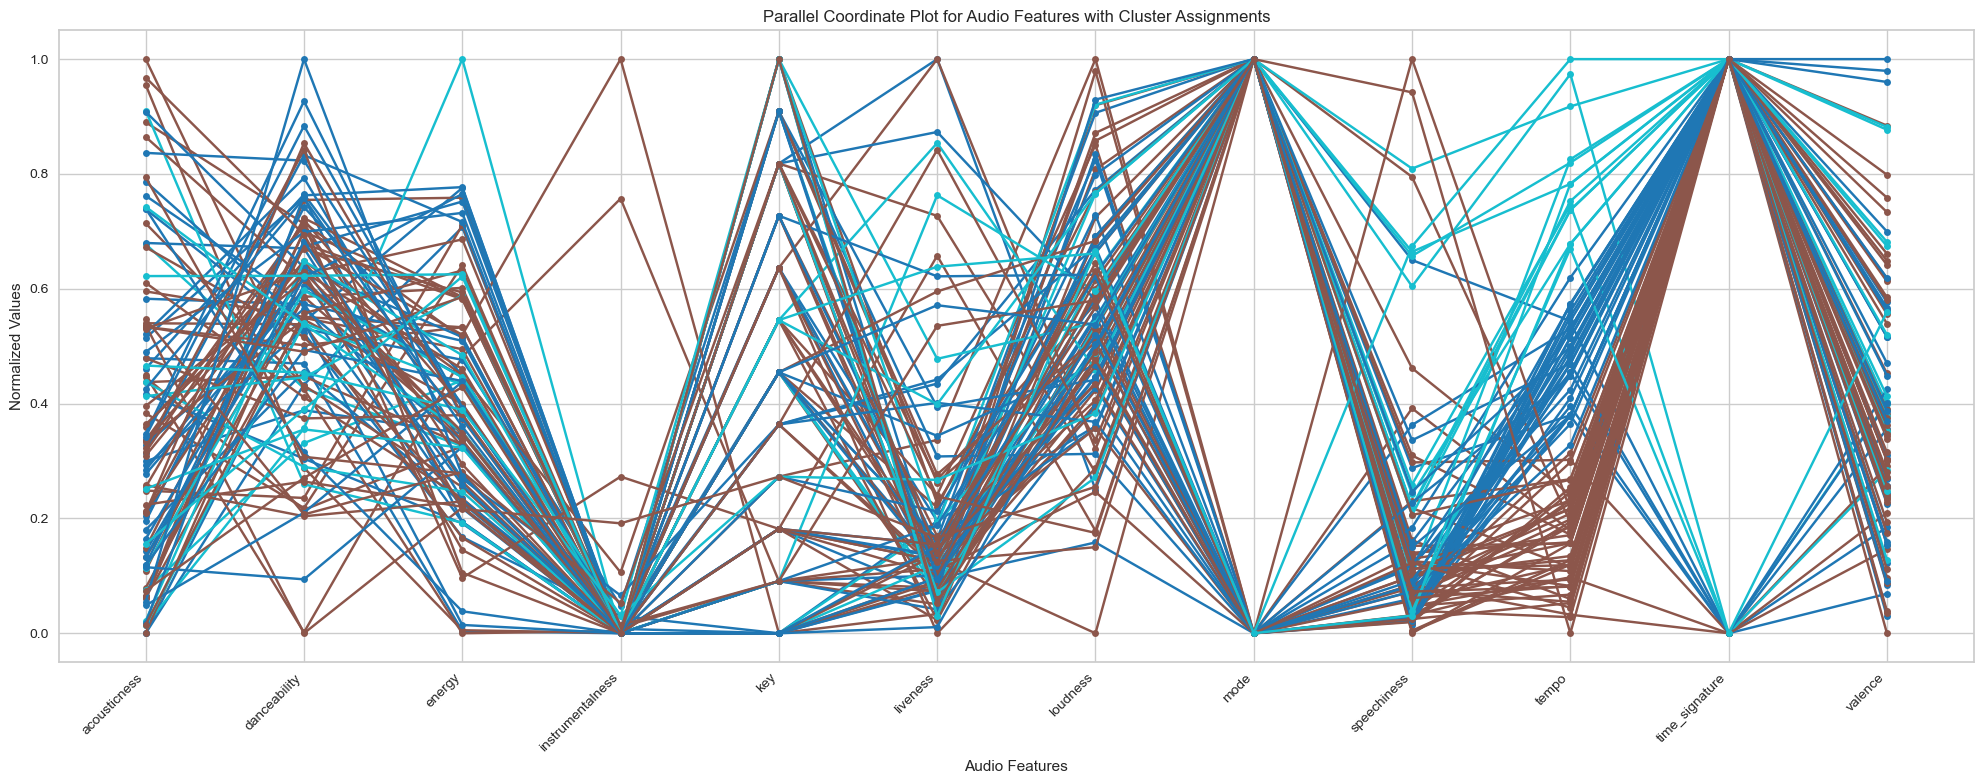

In [6]:
audioFeatureVectors = library.processPlaylist('69etXgxcVioLkJrrk4Y0DA')
k = determineClusterQuantity(audioFeatureVectors)
print(k)

kmeans = KMeans(n_clusters=k, random_state=seed)
clusterLabels = kmeans.fit_predict(audioFeatureVectors)

categorizeTracksWithClusters(audioFeatureVectors, clusterLabels)

In [7]:
kmeans.cluster_centers_

array([[ 3.37567730e-01,  6.53864865e-01,  4.88810811e-01,
         1.59907189e-03,  4.91891892e+00,  1.52248649e-01,
        -7.94659459e+00,  5.67567568e-01,  6.97783784e-02,
         1.33146757e+02,  3.86486486e+00,  3.58378378e-01],
       [ 3.64323061e-01,  6.00020408e-01,  4.84510204e-01,
         1.56677310e-02,  4.83673469e+00,  1.39481633e-01,
        -8.23620408e+00,  6.93877551e-01,  8.99510204e-02,
         9.00194898e+01,  3.93877551e+00,  3.44765306e-01],
       [ 3.29142857e-01,  5.52571429e-01,  5.42142857e-01,
         1.40192714e-03,  6.00000000e+00,  1.82221429e-01,
        -7.60707143e+00,  8.57142857e-01,  1.65185714e-01,
         1.75366571e+02,  3.78571429e+00,  4.42642857e-01]])

/Users/cedrickwong/opt/miniconda3/envs/spotify/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/cedrickwong/opt/miniconda3/envs/spotify/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/cedrickwong/opt/miniconda3/envs/spotify/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/cedrickwong/opt/miniconda3/envs/spotify/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

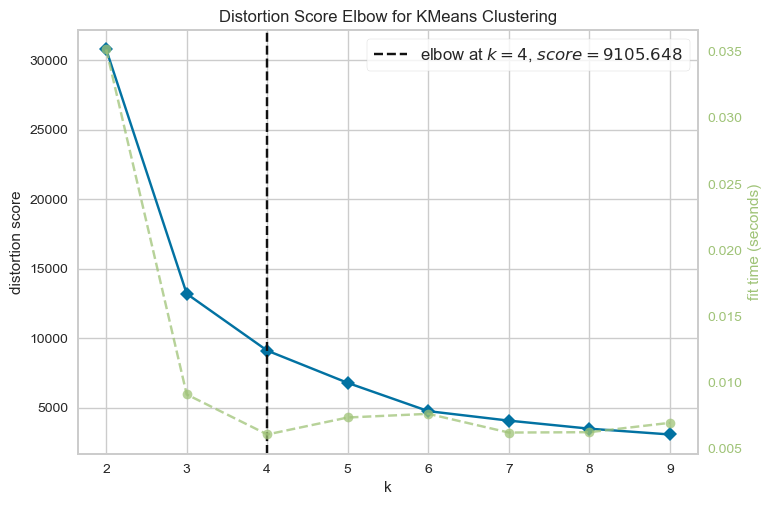

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
km = KMeans(random_state=seed)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(audioFeatureVectors)        # Fit the data to the visualizer
visualizer.show()